# Plotting with categorical data

Dalam tutorial plot relasional kami melihat bagaimana menggunakan representasi visual yang berbeda untuk menunjukkan hubungan antara beberapa variabel dalam dataset. Dalam contoh, kami fokus pada kasus-kasus di mana hubungan utama adalah antara dua variabel numerik. Jika salah satu variabel utama adalah "kategoris" (dibagi menjadi kelompok-kelompok diskrit) mungkin akan bermanfaat untuk menggunakan pendekatan yang lebih khusus untuk visualisasi.

Di seaborn, ada beberapa cara berbeda untuk memvisualisasikan hubungan yang melibatkan data kategorikal. Mirip dengan hubungan antara relplot () dan scatterplot () atau lineplot (), ada dua cara untuk membuat plot ini. Ada sejumlah fungsi level sumbu untuk memplot data kategorikal dengan cara yang berbeda dan antarmuka level gambar, catplot (), yang memberikan akses tingkat tinggi yang disatukan kepada mereka.

Sangat membantu untuk memikirkan berbagai jenis plot kategorikal sebagai milik tiga keluarga yang berbeda, yang akan kami diskusikan secara rinci di bawah ini. Mereka:

Categorical scatterplots:

stripplot () (with kind = "strip"; default)
swarmplot () (with kind = "swarm")

Categorical distribution plots:

boxplot () (with kind = "box")
violinplot () (with kind = "violin")
boxenplot () (with kind = "boxen")

Categorical estimate plots:

pointplot () (with kind = "point")
barplot () (with kind = "bar")
countplot () (with kind = "count")
Keluarga-keluarga ini mewakili data menggunakan berbagai tingkat granularitas. Saat mengetahui mana yang harus digunakan, Anda harus memikirkan pertanyaan yang ingin Anda jawab. API terpadu membuatnya mudah untuk beralih di antara berbagai jenis dan melihat data Anda dari beberapa perspektif.

Dalam tutorial ini, sebagian besar kita akan fokus pada antarmuka level gambar, catplot (). Ingatlah bahwa fungsi ini adalah antarmuka level yang lebih tinggi dari masing-masing fungsi di atas, jadi kami akan merujuknya ketika kami menunjukkan setiap jenis plot, menjaga dokumentasi API jenis spesifik yang lebih jelas tersedia.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


## Categorical scatterplots

Representasi default data dalam catplot () menggunakan sebar sebaran. Sebenarnya ada dua plot pencar kategori berbeda di seaborn. Mereka mengambil pendekatan berbeda untuk menyelesaikan tantangan utama dalam merepresentasikan data kategoris dengan sebar plot, yaitu bahwa semua poin yang termasuk dalam satu kategori akan jatuh pada posisi yang sama di sepanjang sumbu yang sesuai dengan variabel kategorikal. Pendekatan yang digunakan oleh stripplot (), yang merupakan "jenis" default di catplot () adalah untuk menyesuaikan posisi titik pada sumbu kategoris dengan sejumlah kecil "jitter" acak:

In [30]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


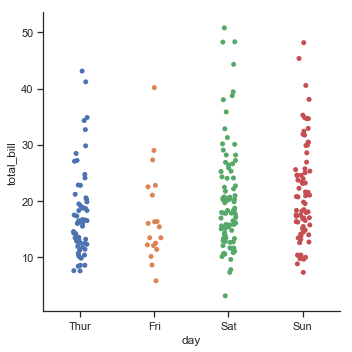

In [2]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

#'catplot ()' adalah untuk menyesuaikan posisi titik pada sumbu kategoris dengan sejumlah kecil "jitter" acak:

Parameter jitter mengontrol besarnya jitter atau menonaktifkannya sama sekali:

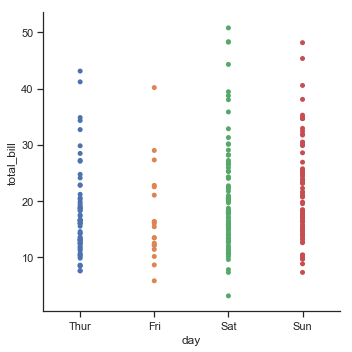

In [3]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

Pendekatan kedua menyesuaikan titik-titik di sepanjang sumbu kategorikal menggunakan algoritma yang mencegah mereka tumpang tindih. Ini dapat memberikan representasi yang lebih baik dari distribusi pengamatan, meskipun hanya bekerja dengan baik untuk dataset yang relatif kecil. Jenis plot ini kadang-kadang disebut "beeswarm" dan digambar di seaborn oleh swarmplot (), yang diaktifkan dengan menyetel kind = "swarm" di catplot ():

In [31]:
? sns.catplot

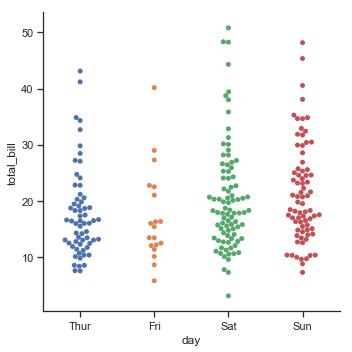

In [4]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

#jenis plot  "beeswarm" pada seaborn oleh swarmplot (), yang diaktifkan dengan menyetel kind = "swarm" di catplot ():
#hal tersebut berfungsi untuk menyesuaikan titik-titik di sepanjang sumbu kategorikal menggunakan algoritma yang mencegah mereka tumpang tindih. 
#Ini dapat memberikan representasi yang lebih baik dari distribusi pengamatan

Mirip dengan relational plots, dimungkinkan untuk menambahkan dimensi lain ke categorical plot dengan menggunakan "hue" semantik. (Categorical plots saat ini tidak mendukung size atau style semantics). Setiap fungsi plot kategoris yang berbeda menangani rona (hue) semantik secara berbeda. Untuk scatter plot, hanya perlu mengubah warna titik:

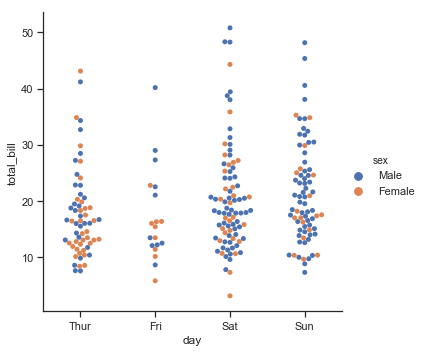

In [5]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

#untuk mempermudah pengamatan dapat ditambahkan rona sematik 'hue' dengan perbedaan warna`

Berbeda dengan data numerik, tidak selalu jelas bagaimana cara memesan level variabel kategorikal di sepanjang porosnya. Secara umum, fungsi plot kategoris seaborn mencoba menyimpulkan urutan kategori dari data. Jika data Anda memiliki sebuah pandas Categorical datatype, maka urutan default kategori dapat diatur di sana. Jika variabel yang dikirimkan ke sumbu kategorikal terlihat numerik, level akan diurutkan. Tetapi data masih diperlakukan sebagai kategorikal dan digambar pada posisi ordinal pada sumbu kategorikal (khususnya, pada 0, 1, ...) bahkan ketika angka digunakan untuk memberi label:

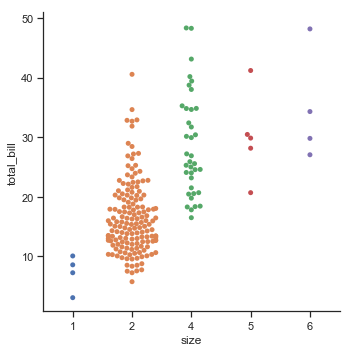

In [6]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

#'tips.query' digunakan untuk mengurutkan data numerik berdasarkan level data

Pilihan lain untuk memilih pemesanan default adalah untuk mengambil level kategori seperti yang muncul dalam dataset. Pemesanan juga dapat dikontrol berdasarkan plot-spesifik menggunakan parameter pesanan. Ini bisa penting ketika menggambar beberapa plot kategorikal dalam gambar yang sama, yang akan kita lihat lebih banyak di bawah ini:

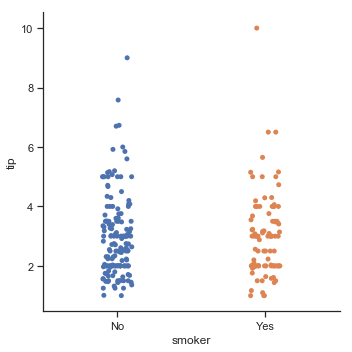

In [7]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

#untuk mengambil level kategori pada variabel smoker dapat dikontrol melalui parameter pesanan dengan penambahan keterangan "No" atau "yes"
#pada variabel smoker

Kami telah merujuk gagasan "poros kategorikal". Dalam contoh-contoh ini, itu selalu terkait dengan sumbu horizontal. Tetapi seringkali membantu untuk meletakkan variabel kategori pada sumbu vertikal (terutama ketika nama kategori relatif panjang atau ada banyak kategori). Untuk melakukan ini, tukar penugasan variabel ke sumbu:

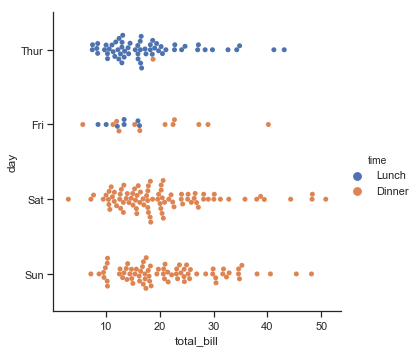

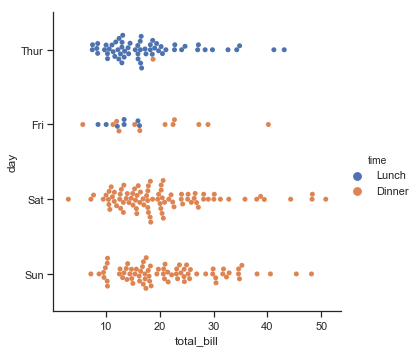

In [8]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

#ketika nama kategori relatif panjang atau kategori relatif banyak dapat dilakukan pertukaran sumbu antara x dan y sehingga
#arah plot berada pada posisi horizontal.

## Distributions of observations within categories

Seiring dengan bertambahnya ukuran dataset, categorical scatter plots menjadi terbatas dalam informasi yang dapat mereka berikan tentang distribusi nilai dalam setiap kategori. Ketika ini terjadi, ada beberapa pendekatan untuk meringkas informasi distribusi dengan cara yang memudahkan perbandingan antar tingkat kategori.

### Boxplots

Yang pertama adalah boxplot(). Jenis plot ini menunjukkan tiga nilai kuartil distribusi bersama dengan nilai ekstrim. "whiskers" meluas ke titik-titik yang terletak dalam 1,5 IQR dari kuartil bawah dan atas, dan kemudian pengamatan yang berada di luar kisaran ini ditampilkan secara independen. Ini berarti bahwa setiap nilai dalam kotak itu sesuai dengan pengamatan aktual dalam data.

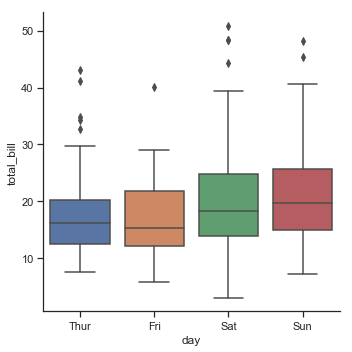

In [9]:
#Boxplots
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

##Jenis plot ini menunjukkan tiga nilai kuartil distribusi bersama dengan nilai ekstrim. 
#"Kumis" meluas ke titik-titik yang terletak dalam 1,5 IQR dari kuartil bawah dan atas, 
#dan kemudian pengamatan yang berada di luar kisaran ini ditampilkan secara independen. 
#Ini berarti bahwa setiap nilai dalam kotak itu sesuai dengan pengamatan aktual dalam data.

Saat menambahkan rona (hue) semantik, kotak untuk setiap tingkat variabel semantik dipindahkan di sepanjang sumbu kategorikal sehingga mereka tidak tumpang tindih:

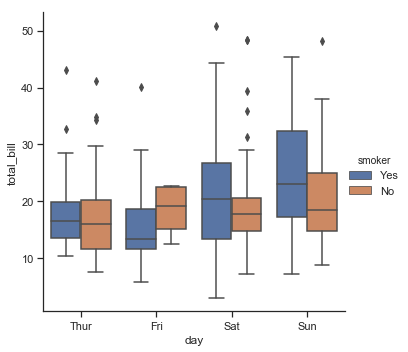

In [10]:
#agar boxplot tidak tumpang tindih
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

#menambahkan huesemantik, kotak untuk setiap level variabel semantik dipindahkan di sepanjang sumbu kategorikal 
#sehingga tidak tumpang tindih

Perilaku ini disebut "dodging" dan dihidupkan secara default karena diasumsikan bahwa variabel semantik bersarang di dalam variabel kategori utama. Jika bukan itu masalahnya, Anda dapat menonaktifkan dodging:

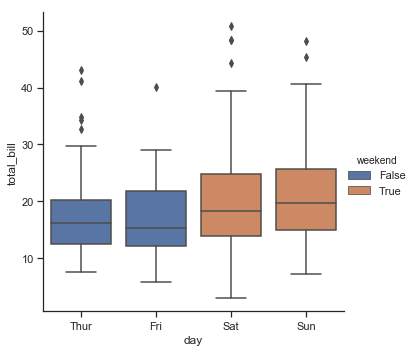

In [11]:
#menonaktifkan dodging
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

#Perilaku ini disebut "menghindari" dan dihidupkan secara default karena diasumsikan bahwa variabel semantik bersarang 
#di dalam variabel kategori utama. Jika bukan itu masalahnya, Anda dapat menonaktifkan dodging

Fungsi terkait, boxenplot (), menggambar plot yang mirip dengan plot kotak tetapi dioptimalkan untuk menunjukkan informasi lebih lanjut tentang bentuk distribusi. Ini paling cocok untuk kumpulan data yang lebih besar:

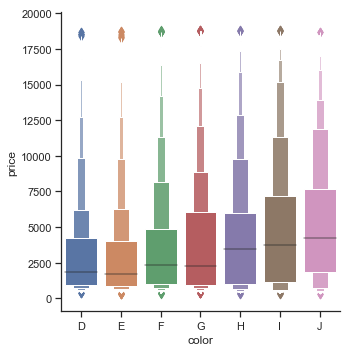

In [12]:
#menggambar plot yang mirip dengan plot kotak
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

#Fungsi terkait boxenplot(),, menggambar plot yang mirip dengan plot kotak tetapi dioptimalkan untuk menunjukkan 
#informasi lebih lanjut tentang bentuk distribusi. Ini paling cocok untuk kumpulan data yang lebih besar

### Violinplots

Pendekatan yang berbeda adalah violinplot (), yang menggabungkan boxplot dengan prosedur estimasi kepadatan kernel yang dijelaskan dalam tutorial distribusi:

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


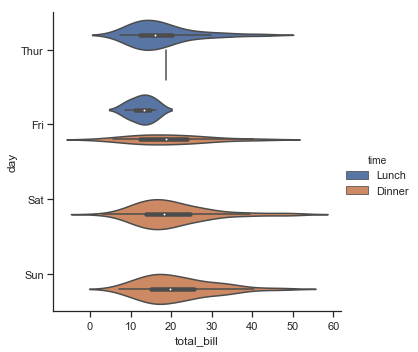

In [13]:
#Biola
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips);

#Pendekatan yang berbeda adalah a violinplot(), yang menggabungkan boxplot dengan prosedur estimasi kepadatan kernel 

Pendekatan ini menggunakan estimasi kepadatan kernel untuk memberikan deskripsi yang lebih kaya tentang distribusi nilai. Selain itu, nilai quartile dan whikser dari boxplot ditampilkan di dalam biola. Kelemahannya adalah bahwa, karena biola menggunakan KDE, ada beberapa parameter lain yang mungkin perlu diubah, menambahkan beberapa kompleksitas relatif ke kotak langsung:

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


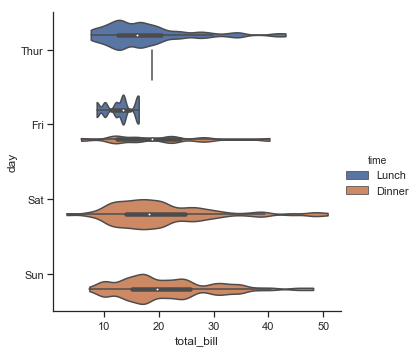

In [14]:
#estimasi kepadatan kernel untuk memberikan deskripsi yang lebih kaya tentang distribusi nilai
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", bw=.15, cut=0,
            data=tips);

#Pendekatan ini menggunakan estimasi kepadatan kernel untuk memberikan deskripsi yang lebih kaya tentang distribusi nilai. 
#Selain itu, nilai quartile dan whikser dari boxplot ditampilkan di dalam biola. Kelemahannya adalah bahwa, karena biola menggunakan KDE


Juga dimungkinkan untuk "split" biola ketika parameter rona (hue) hanya memiliki dua tingkat, yang memungkinkan penggunaan ruang yang lebih efisien:

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


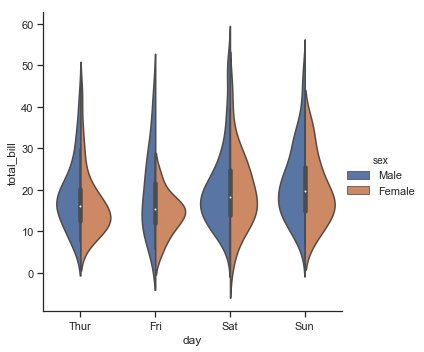

In [15]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

#dimungkinkan untuk "membagi" biola ketika parameter rona hanya memiliki dua tingkat, 
#yang memungkinkan penggunaan ruang yang lebih efisien

Akhirnya, ada beberapa opsi untuk plot yang digambar di bagian dalam biola, termasuk cara-cara untuk menunjukkan setiap pengamatan individu alih-alih nilai ringkasan boxplot:

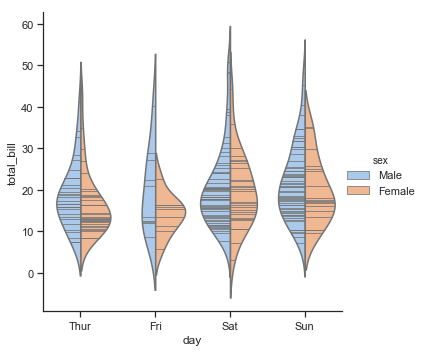

In [16]:
#menunjukkan setiap pengamatan individu nilai ringkasan boxplot
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

Juga dapat bermanfaat untuk menggabungkan swarmplot () atau striplot () dengan plot kotak atau plot biola untuk menunjukkan setiap pengamatan bersama dengan ringkasan distribusi:

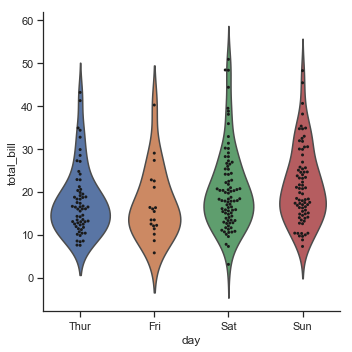

In [17]:
#menggabungkan swarmplot()atau striplot()dengan plot kotak atau plot biola untuk 
#menunjukkan setiap pengamatan bersama dengan ringkasan distribusi
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

#untuk menggabungkan swarmplot()atau striplot()dengan plot kotak atau plot biola untuk menunjukkan setiap pengamatan

## Statistical estimation within categories

Untuk aplikasi lain, daripada menunjukkan distribusi dalam setiap kategori, Anda mungkin ingin menunjukkan perkiraan kecenderungan sentral dari nilai-nilai tersebut. Seaborn memiliki dua cara utama untuk menunjukkan informasi ini. Yang penting, API dasar untuk fungsi-fungsi ini identik dengan yang untuk yang dibahas di atas.

### Bar plot

Gaya alur yang sudah lazim yang mencapai tujuan ini adalah alur plot. Di seaborn, fungsi barplot () beroperasi pada dataset lengkap dan menerapkan fungsi untuk mendapatkan estimasi (mengambil mean secara default). Ketika ada beberapa pengamatan di setiap kategori, itu juga menggunakan bootstrap untuk menghitung interval kepercayaan di sekitar estimasi dan plot yang menggunakan bar kesalahan:

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


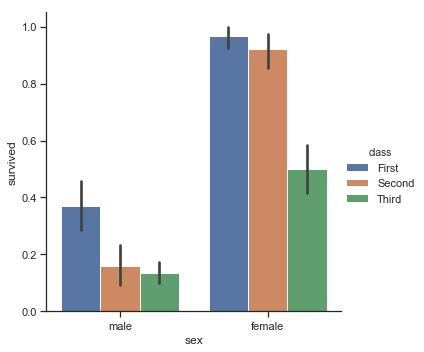

In [18]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

#kind (bar): jenis plot batang
#hue (class): warna dibedakan berdasarkan variabel "class"
#sns.catplot: 

In [19]:
titanic.head

<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
5           0       3    male   NaN      0      0    8.4583        Q   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11        

Kasus khusus untuk bar plot adalah ketika Anda ingin menunjukkan jumlah pengamatan di setiap kategori daripada menghitung statistik untuk variabel kedua. Ini mirip dengan histogram lebih dari variabel, bukan kuantitatif, variabel. Di seaborn, mudah dilakukan dengan fungsi countplot ():

In [20]:
?sns.catplot

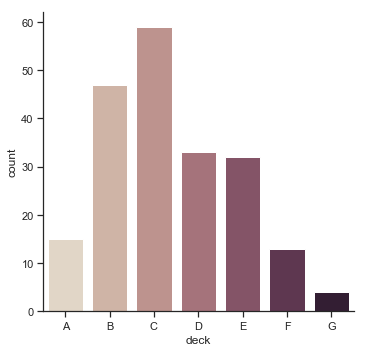

In [21]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

#palette (palet): pewarnaan diagram
#count:jumlahan

Barplot () dan countplot () dapat dipanggil dengan semua opsi yang dibahas di atas, bersama dengan opsi lain yang diperlihatkan dalam dokumentasi terperinci untuk setiap fungsi:

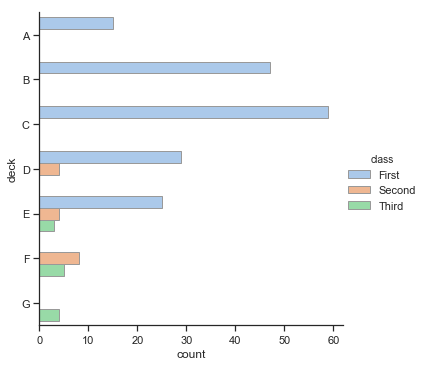

In [22]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

#edgecolor: garis tepi batang diagram
#hue (class): pewarnaan berdasarkan variabel class
#palette: jenis pewarnaan diagram

### Point plots

Gaya alternatif untuk memvisualisasikan informasi yang sama ditawarkan oleh fungsi pointplot (). Fungsi ini juga mengkodekan nilai estimasi dengan ketinggian di sumbu lain, tetapi bukannya menampilkan bilah penuh, ia memplot estimasi titik dan interval kepercayaan. Selain itu, pointplot () menghubungkan poin dari kategori rona yang sama. Ini membuatnya mudah untuk melihat bagaimana hubungan utama berubah sebagai fungsi dari rona semantik, karena mata Anda cukup pandai menangkap perbedaan lereng:

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


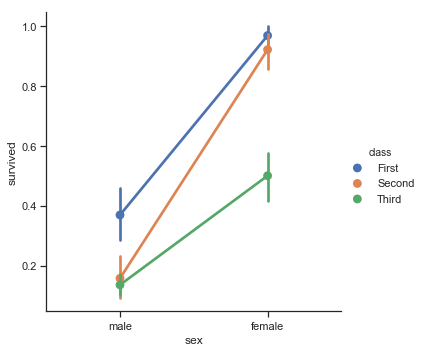

In [23]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

#kind (point): jenis plot 
#hue (class): pewarnaan yang beda berdasarkan variabel class

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


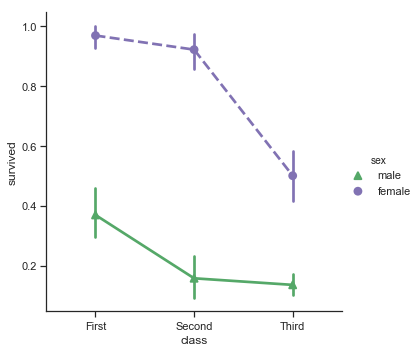

In [24]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

#markers:bentuk/gaya penanda
#linestyles: bentuk/gaya garis penghubung 
#kind (point): jenis plot
#palette: pewarnaan point plot berdasarkan variabel sex, 
#male diberi warna hijau dengan marker segitiga dan female diberi warna ungu dengan marker bulat

## Plotting “wide-form” data

Ketika menggunakan data "long-form" atau "tidy" lebih disukai, fungsi-fungsi ini juga dapat diterapkan ke data "wide-form" dalam berbagai format, termasuk panda DataFrames atau array numpy dua dimensi. Objek-objek ini harus diteruskan langsung ke parameter data:

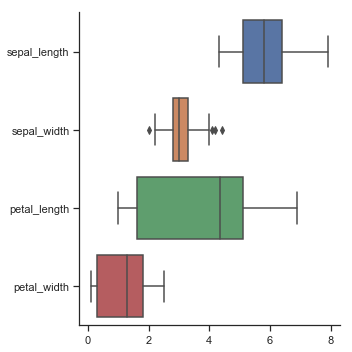

In [25]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box");
# data = iris
# orient = bentuk plot data horozontal
# kind = jenis plot kotak

Selain itu, fungsi level sumbu menerima vektor Pandas atau objek numpy daripada variabel dalam DataFrame:

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


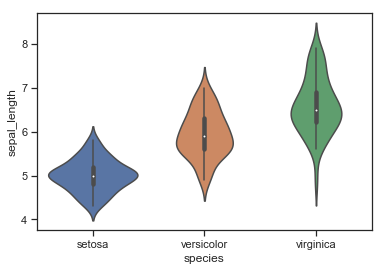

In [26]:
sns.violinplot(x=iris.species, y=iris.sepal_length);
# x = variabel iris.species
# y = variabel iris sepal_length

Untuk mengontrol ukuran dan bentuk plot yang dibuat oleh fungsi yang dibahas di atas, Anda harus mengatur sendiri gambar menggunakan perintah matplotlib:

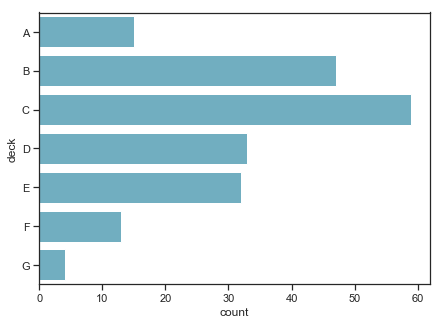

In [27]:
titanic = sns.load_dataset("titanic")
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(y="deck", data=titanic, color="c");
# figsize = 7 (panjang bar chart), 5 (lebar bar chart)
# y = variabel deck 
# data = titanic  
# color = warna

Ini adalah pendekatan yang harus Anda ambil ketika Anda membutuhkan figur kategoris untuk dengan senang hati hidup berdampingan dalam figur yang lebih kompleks dengan jenis plot lainnya.

## Showing Multiple Relationships With Facets

Sama seperti relplot (), fakta bahwa catplot () dibangun di atas FacetGrid berarti mudah untuk menambahkan variabel faceting untuk memvisualisasikan hubungan dimensi yang lebih tinggi:

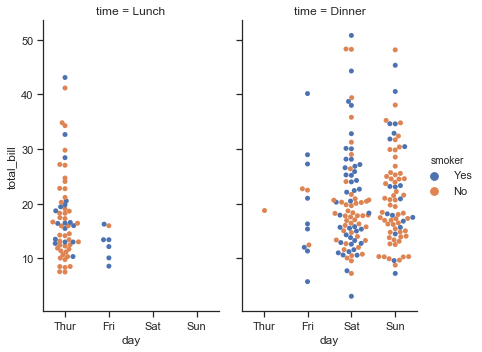

In [28]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);
#x: variabel x (day); y: variabel y (total_bill); hue: nama variabel yg terdapat pada data (smoker);
#col: nama variabel yg terdapat pd data yg diletakkan di kolom (time); aspect: rasio aspek dari setiap sisi
#kind: jenis plot ; data: data

Untuk kustomisasi lebih lanjut dari plot, Anda dapat menggunakan metode pada objek FacetGrid yang dikembalikan:

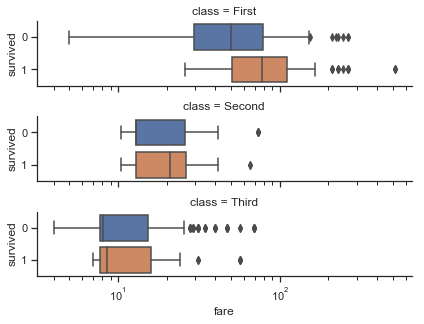

In [29]:
titanic = sns.load_dataset("titanic")
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");
#x: variabel x (fare); y: variabel y (survived); row: nama variabel yg terdapat pd data yg diletakkan di baris (class)
#kind: jenis plot; orient: orientasi plot (vertikal/horizontal) ; height: tinggi; aspect: rasio aspek dari setiap sisi
#data: data